### NMF - Non-Negative Matrix Factorization
```
FileName: NMF-v1.ipynb
Last Updated Date: 11-Jul-2018
Input: Librosa120Sec577FeatsCSVExtract20_v3.gzip
Output: Librosa120Sec577FeatsCSVExtract20_v3_ReducedNMF.gzip
Runtime: 4 mins
Description: Reduce Features.  Need absolute values, so using Min Max scaler
             Use writeTransformedDataFlag to ourput transformed data
             With writeTransformedDataFlag True, you can also use HeaderOverride flag to
             rename all features from f0 to fxx; if this is false then you will need to 
             use ColumnsHeadingMatch-v1.ipynb to figure out common columns between Train and Test files
             If writeTransformedDataFlag is False then it writes original data; then do not 
             run this program for Test file; use ReduceCSVColumnsUsingSampleFile_v1.ipynb to
             create Test file
Version:
    v1: 11-Jul-2018: Initial Version
    v2: 12-Jul-2018: Write original x_data instead of transformed data; provide parameter
```

In [60]:
fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract20_v3"# Train
# fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract10Test_v3" # Test
n_feats = 8
writeTransformedDataFlag = True
writeTransformedDataHeaderOverrideFlag = False

In [61]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF
import pandas as pd
import datetime

In [62]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-13 06:16:12


In [63]:
from matplotlib import pyplot as plt

def plot_step_lda(newX_data, newY_data):

    label_dict = {0: 'Sad', 1: 'Happy'}

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=newX_data[:,0].real[newY_data == label],
                y=newX_data[:,1].real[newY_data == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

In [64]:
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [65]:
x_data = df.drop('label',axis=1)
y_labels = df['label'].values

In [66]:
x_data.shape

(206665, 577)

In [67]:
y_labels.shape

(206665,)

In [68]:
y_labels

array([0., 0., 0., ..., 1., 1., 1.])

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.00001,random_state=101) # 71351729)

In [70]:
X_train.shape

(206662, 577)

In [71]:
y_train.shape

(206662,)

In [72]:
import sklearn
# scaler = sklearn.preprocessing.StandardScaler()
scaler = sklearn.preprocessing.MinMaxScaler()
# scaler = sklearn.preprocessing.MaxAbsScaler()
# scaler = sklearn.preprocessing.QuantileTransformer()
# scaler = sklearn.preprocessing.Normalizer()

In [73]:
X_train = pd.DataFrame(data=scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test  = pd.DataFrame(data=scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


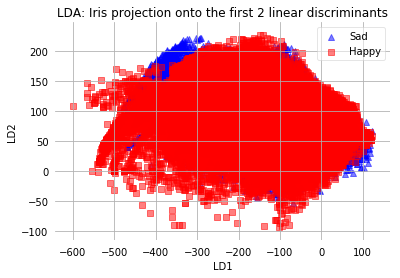

In [74]:
plot_step_lda(x_data.as_matrix(columns=None), y_labels)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


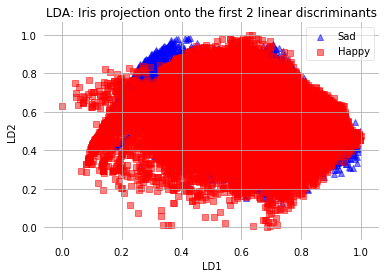

In [75]:
plot_step_lda(X_train.as_matrix(columns=None), y_train)

In [76]:
# Create, fit, and apply NMF
model = NMF(n_components=n_feats) 
W = model.fit_transform(X_train)

In [77]:
H = model.components_

In [78]:
H.shape

(8, 577)

In [79]:
import pandas
def getNewDF(X_data, y_labels, componentArray):
    loading_scores = pd.Series(componentArray[0])
    ## now sort the loading scores based on their magnitude
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    top_feats = sorted_loading_scores[0:componentArray.shape[0]].index.values
    overrideHeaderFlag = False
    if writeTransformedDataFlag == True:
        if writeTransformedDataHeaderOverrideFlag == True:
            overrideHeaderFlag = True
    if overrideHeaderFlag == True:
        newHeadList = ["f" + str(i) for i in range(len(top_feats))]
    else:
        newHeadList = ["f" + str(i) for i in top_feats]
    print("newHeadList:", newHeadList)
    newDF = pandas.DataFrame(data=X_data, columns=newHeadList)
    newDF["label"] = y_labels
    return(newDF)

In [80]:
# Write Transformed data or Original Data
if writeTransformedDataFlag == True:
    newDF = getNewDF(W, y_train, H)
else:
    newDF = getNewDF(X_train, y_train, H)

newHeadList: ['f194', 'f195', 'f207', 'f243', 'f223', 'f242', 'f213', 'f224']


In [81]:
newDF.columns

Index(['f194', 'f195', 'f207', 'f243', 'f223', 'f242', 'f213', 'f224',
       'label'],
      dtype='object')

In [82]:
newDF.to_csv(path_or_buf=(fileNameNoPrefix + "_ReducedNMF" + str(n_feats) + ".gzip"), sep=",", index=False, 
             header=True, compression='gzip')

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


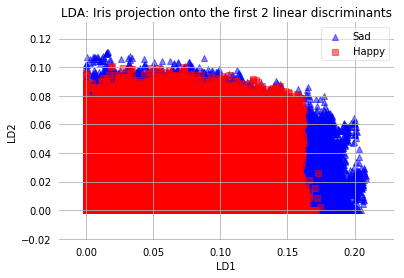

In [83]:
plot_step_lda(W, y_train)

In [84]:
import numpy as np
newX_train = np.dot(W,H)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


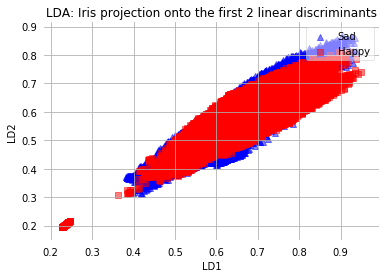

In [85]:
plot_step_lda(newX_train, y_train)

In [86]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-13 06:19:38


In [87]:
y_train

array([1., 1., 0., ..., 1., 1., 1.])